In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.cluster import KMeans


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv("IKP_point.csv")

In [3]:
df

,Desa/Kelurahan,I.1.1.1,I.2.1.1,I.3.1.1,I.4.1.1,II.1.1.1,II.1.2.1,II.1.3.1,II.2.2.1,II.3.3.1,II.3.3.2,III.1.1.1,III.1.1.2,III.1.2.1,III.1.4.1
0,Balauring,0,4,0,4,4,2,1.0,0,0,2,0,0,3,0
1,Benihading,1,4,1,4,4,4,4.0,4,0,1,1,0,4,0
2,Bour,1,3,1,3,0,3,4.0,3,0,3,1,0,3,1
3,Dikesare,0,1,0,3,4,4,NaN,2,0,1,0,0,3,0
4,Duawutun,4,4,0,3,4,4,NaN,2,0,3,0,0,4,0
5,Dulitukan,4,2,0,4,4,4,NaN,4,0,1,0,0,3,0
6,Hoelea I,1,4,0,4,2,1,0.0,1,0,2,0,0,3,0
7,Ile Kimok,0,4,0,4,2,4,2.0,0,0,2,1,0,4,0
8,Kalikur,0,3,0,4,0,0,1.0,1,4,2,0,0,3,0
9,Katakeja,1,1,0,1,2,4,1.0,4,0,1,0,0,3,0


In [4]:
df = df.rename(columns={
    "I.1.1.1": "Rasio Gini Tanah",
    "I.2.1.1": "Luas Tanah yang Dikuasai",
    "I.3.1.1": "Ketersediaan Air untuk Budidaya",
    "I.4.1.1": "Asal Benih",
    "II.1.1.1": "Jenis pestisida yang digunakan",
    "II.1.2.1": "Jenis Pupuk yang Digunakan",
    "II.1.3.1": "Melakukan pemanfaatan limbah pertanian",
    "II.2.2.1": "Keragaman Jenis Tanaman",
    "II.3.3.1": "Nilai Tukar Petani",
    "II.3.3.2": "Rasio rerata penghasilan dengan UMK",
    "III.1.1.1": "Pola Pangan Harapan (PPH)",
    "III.1.1.2": "Indeks Shanon Weiner",
    "III.1.2.1": "Asal Bahan Baku",
    "III.1.4.1": "Daya dukung pangan"
})

In [5]:
df.isna().sum()

Desa/Kelurahan                             0
Rasio Gini Tanah                           0
Luas Tanah yang Dikuasai                   0
Ketersediaan Air untuk Budidaya            0
Asal Benih                                 0
Jenis pestisida yang digunakan             0
Jenis Pupuk yang Digunakan                 0
Melakukan pemanfaatan limbah pertanian    11
Keragaman Jenis Tanaman                    0
Nilai Tukar Petani                         0
Rasio rerata penghasilan dengan UMK        0
Pola Pangan Harapan (PPH)                  0
Indeks Shanon Weiner                       0
Asal Bahan Baku                            0
Daya dukung pangan                         0
dtype: int64

In [6]:
df["Melakukan pemanfaatan limbah pertanian"] = df["Melakukan pemanfaatan limbah pertanian"].fillna(0).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Desa/Kelurahan                          29 non-null     object
 1   Rasio Gini Tanah                        29 non-null     int64 
 2   Luas Tanah yang Dikuasai                29 non-null     int64 
 3   Ketersediaan Air untuk Budidaya         29 non-null     int64 
 4   Asal Benih                              29 non-null     int64 
 5   Jenis pestisida yang digunakan          29 non-null     int64 
 6   Jenis Pupuk yang Digunakan              29 non-null     int64 
 7   Melakukan pemanfaatan limbah pertanian  29 non-null     int32 
 8   Keragaman Jenis Tanaman                 29 non-null     int64 
 9   Nilai Tukar Petani                      29 non-null     int64 
 10  Rasio rerata penghasilan dengan UMK     29 non-null     int64 
 11  Pola Pan

In [8]:
df

,Desa/Kelurahan,Rasio Gini Tanah,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Jenis pestisida yang digunakan,Jenis Pupuk yang Digunakan,Melakukan pemanfaatan limbah pertanian,Keragaman Jenis Tanaman,Nilai Tukar Petani,Rasio rerata penghasilan dengan UMK,Pola Pangan Harapan (PPH),Indeks Shanon Weiner,Asal Bahan Baku,Daya dukung pangan
0,Balauring,0,4,0,4,4,2,1,0,0,2,0,0,3,0
1,Benihading,1,4,1,4,4,4,4,4,0,1,1,0,4,0
2,Bour,1,3,1,3,0,3,4,3,0,3,1,0,3,1
3,Dikesare,0,1,0,3,4,4,0,2,0,1,0,0,3,0
4,Duawutun,4,4,0,3,4,4,0,2,0,3,0,0,4,0
5,Dulitukan,4,2,0,4,4,4,0,4,0,1,0,0,3,0
6,Hoelea I,1,4,0,4,2,1,0,1,0,2,0,0,3,0
7,Ile Kimok,0,4,0,4,2,4,2,0,0,2,1,0,4,0
8,Kalikur,0,3,0,4,0,0,1,1,4,2,0,0,3,0
9,Katakeja,1,1,0,1,2,4,1,4,0,1,0,0,3,0


### analisis distribusi

In [9]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [10]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Rasio Gini Tanah,29.0,1.137931,1.552053,0.0,0.0,1.0,1.0,4.0
Luas Tanah yang Dikuasai,29.0,2.965517,0.905647,1.0,2.0,3.0,4.0,4.0
Ketersediaan Air untuk Budidaya,29.0,0.206897,0.491304,0.0,0.0,0.0,0.0,2.0
Asal Benih,29.0,3.448276,0.909718,1.0,3.0,4.0,4.0,4.0
Jenis pestisida yang digunakan,29.0,2.827586,1.415954,0.0,2.0,3.0,4.0,4.0
Jenis Pupuk yang Digunakan,29.0,3.517241,1.056297,0.0,4.0,4.0,4.0,4.0
Keragaman Jenis Tanaman,29.0,2.586207,1.376259,0.0,2.0,3.0,4.0,4.0
Nilai Tukar Petani,29.0,0.965517,1.741977,0.0,0.0,0.0,0.0,4.0
Rasio rerata penghasilan dengan UMK,29.0,1.724138,0.921821,0.0,1.0,2.0,2.0,4.0
Pola Pangan Harapan (PPH),29.0,0.551724,0.506120,0.0,0.0,1.0,1.0,1.0


In [11]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

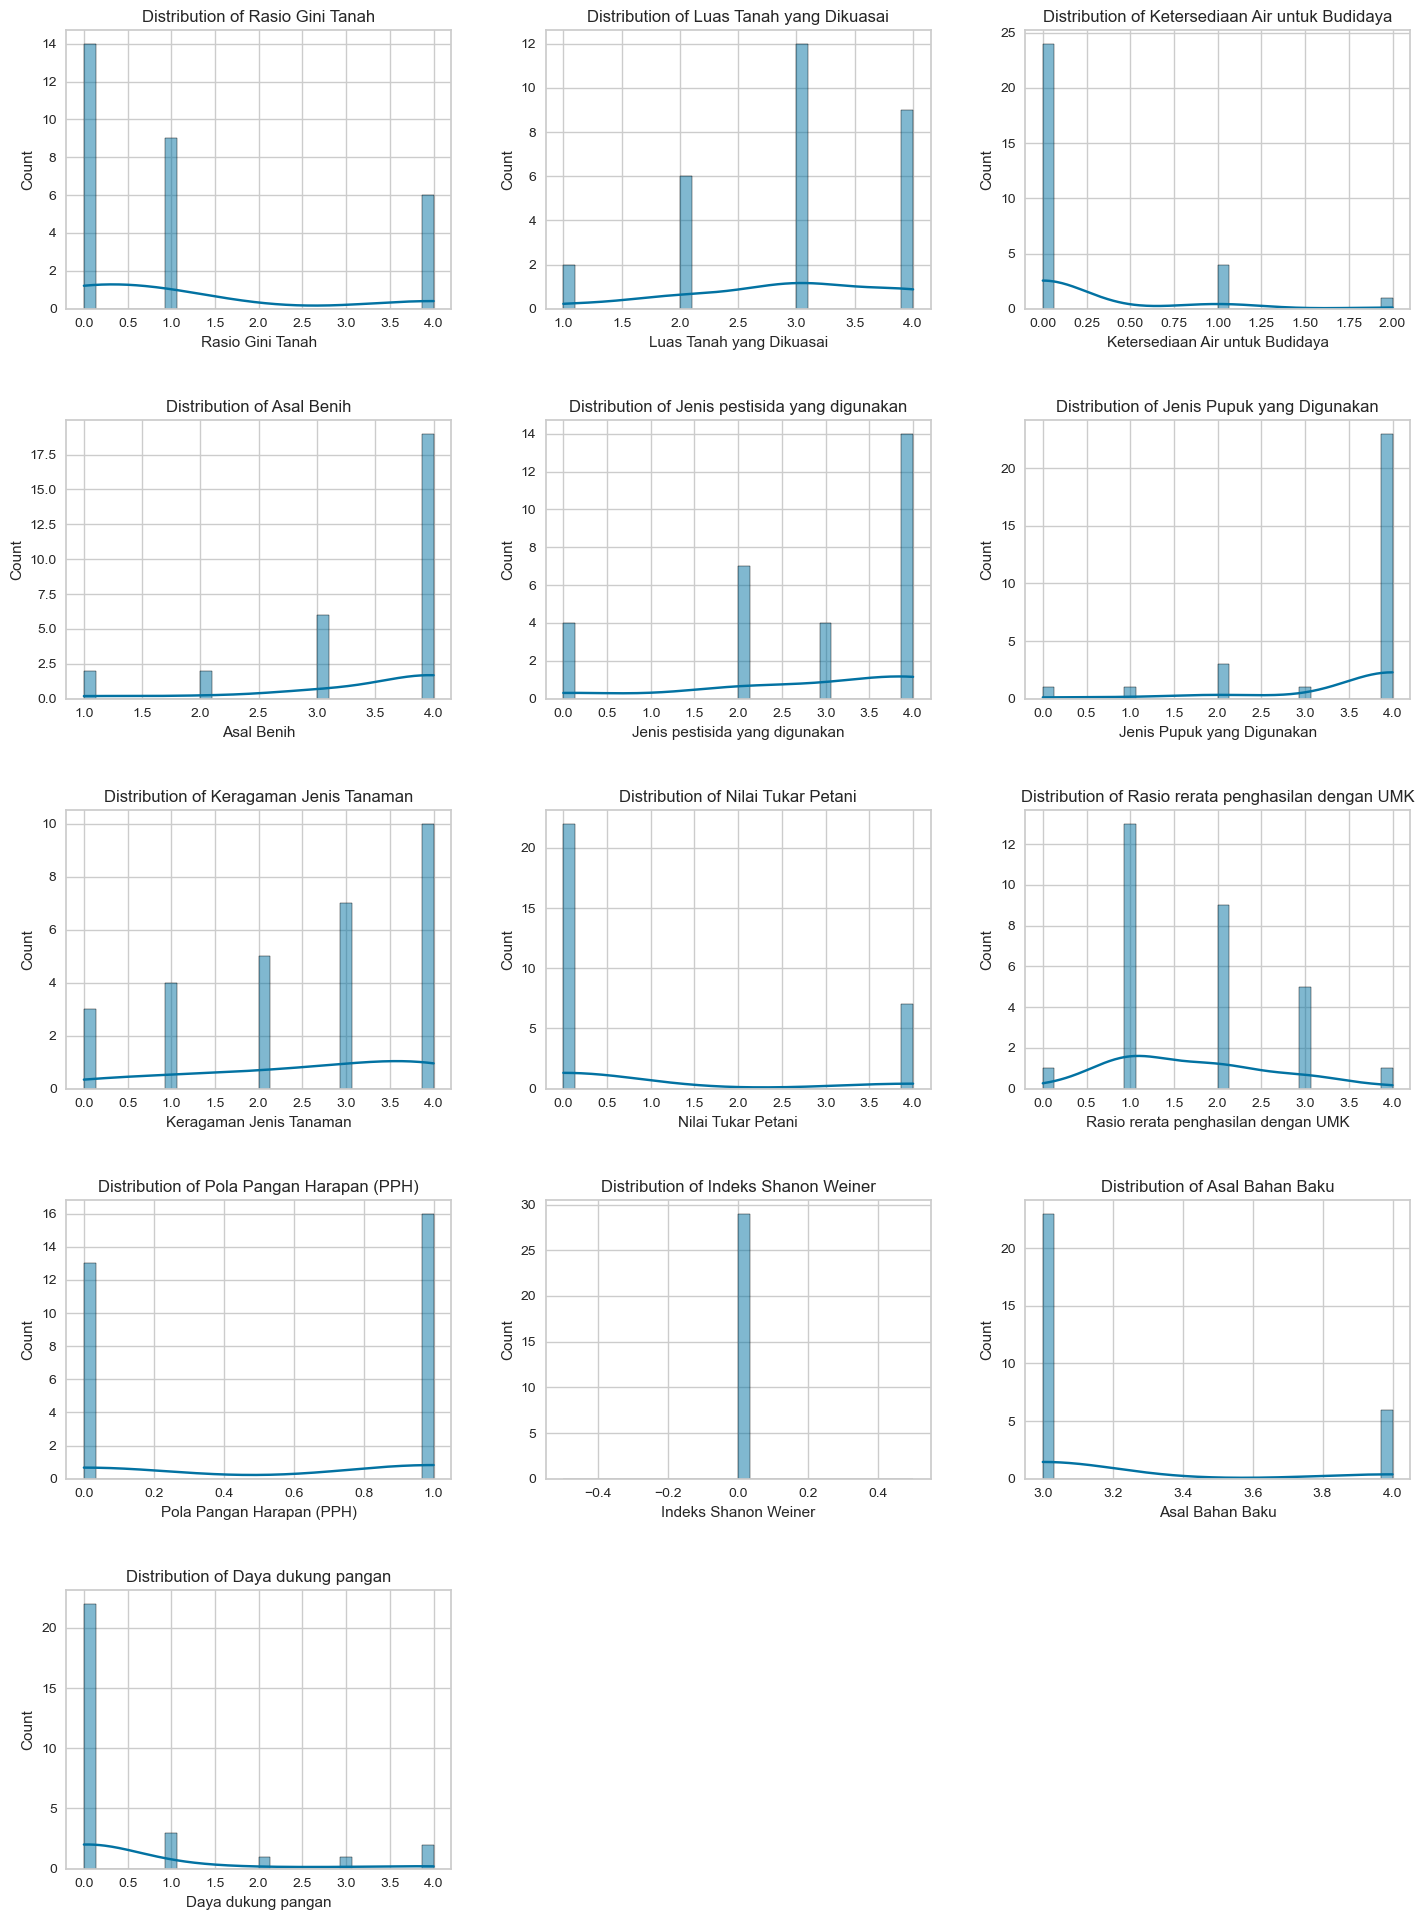

In [12]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# hapus subplot kosong
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

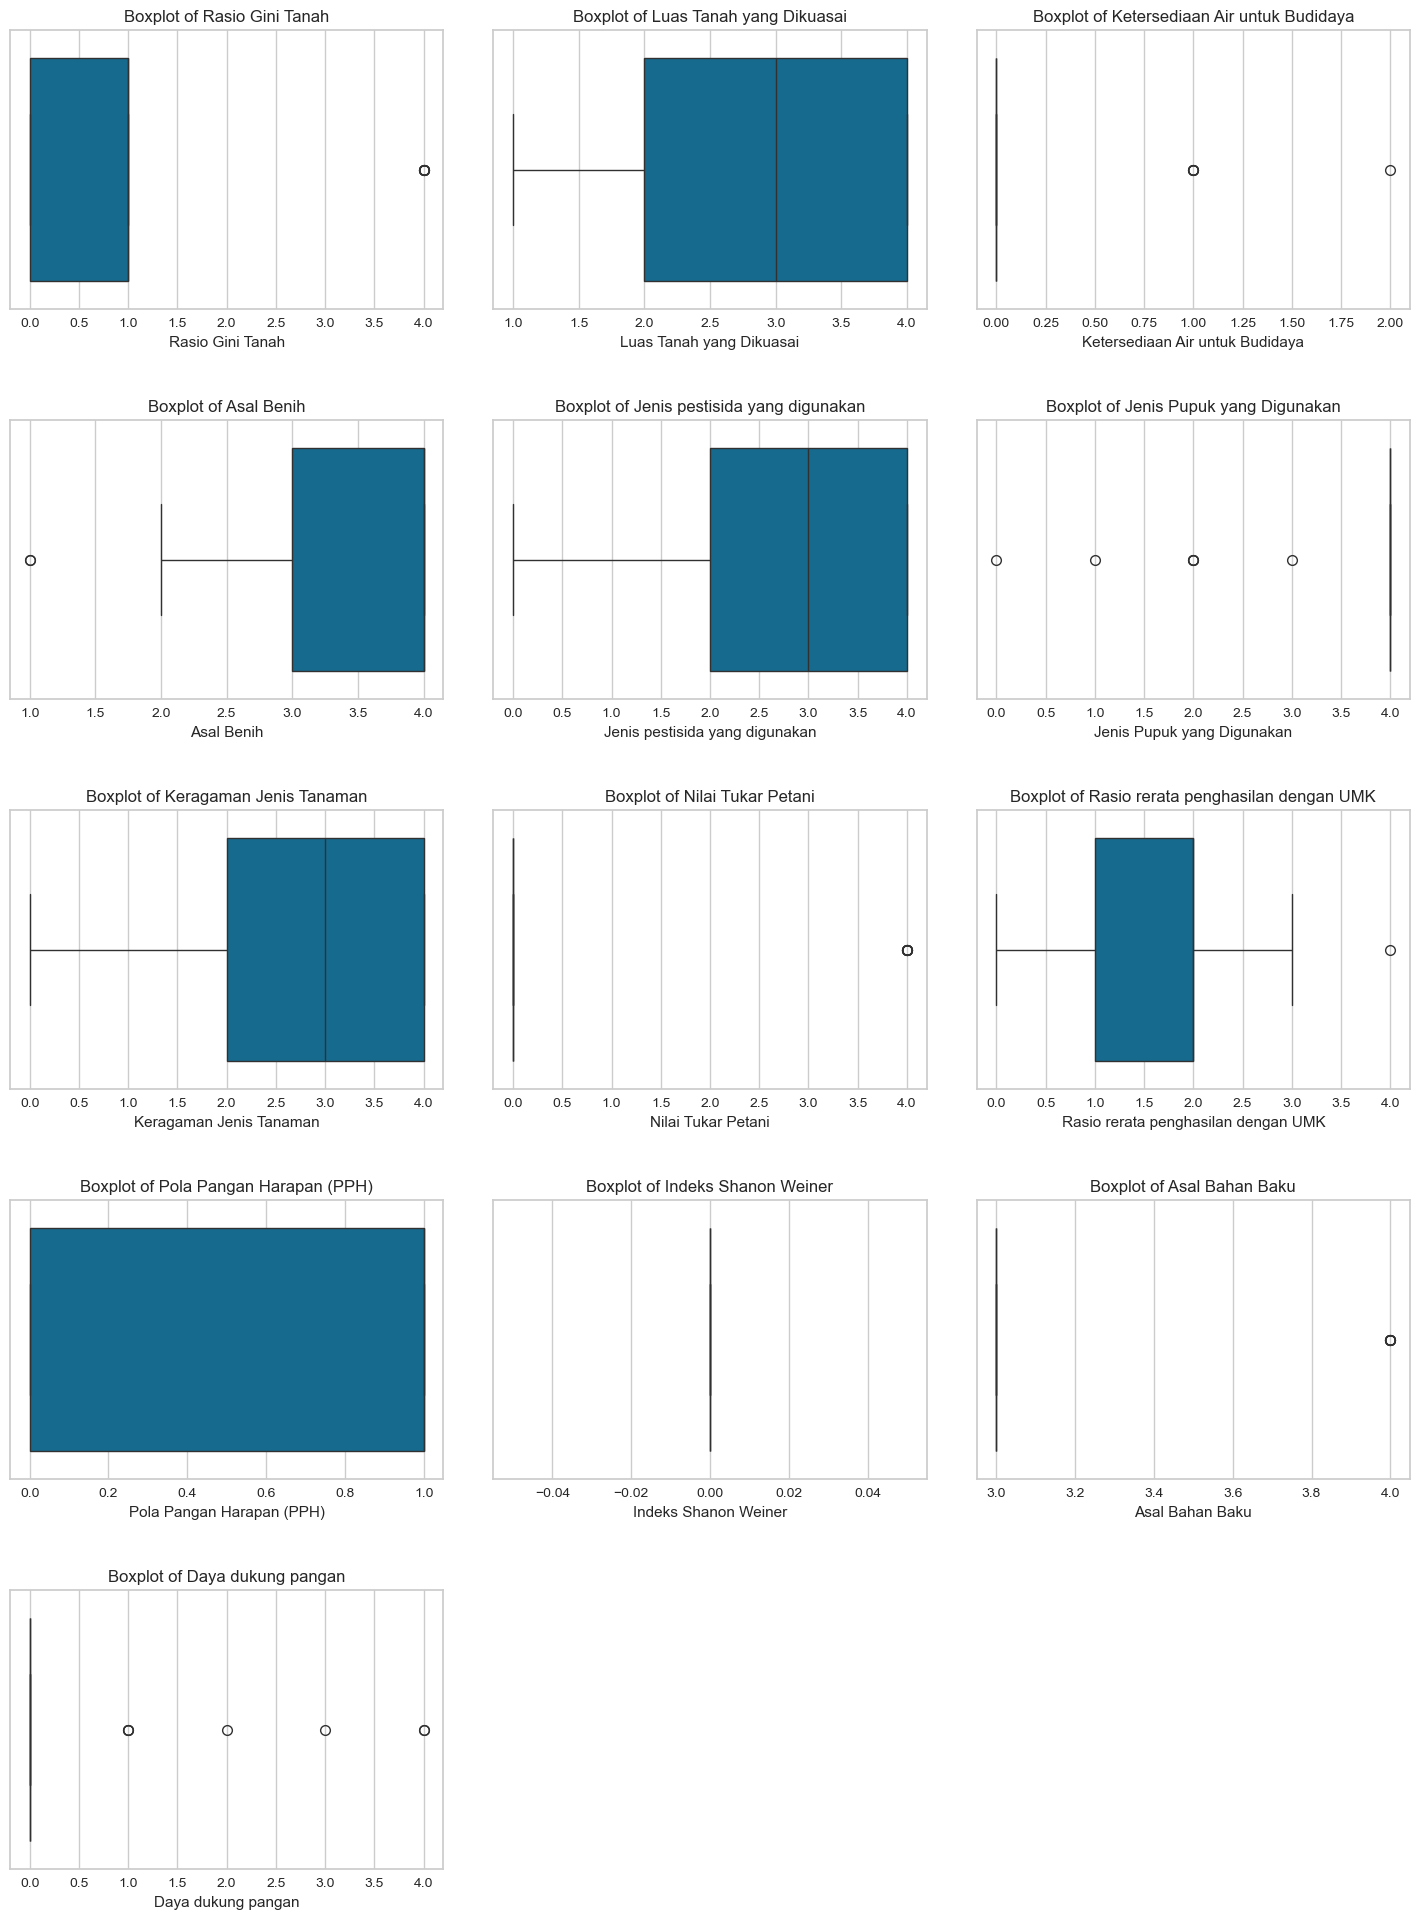

In [13]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# hapus subplot kosong (kalau ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

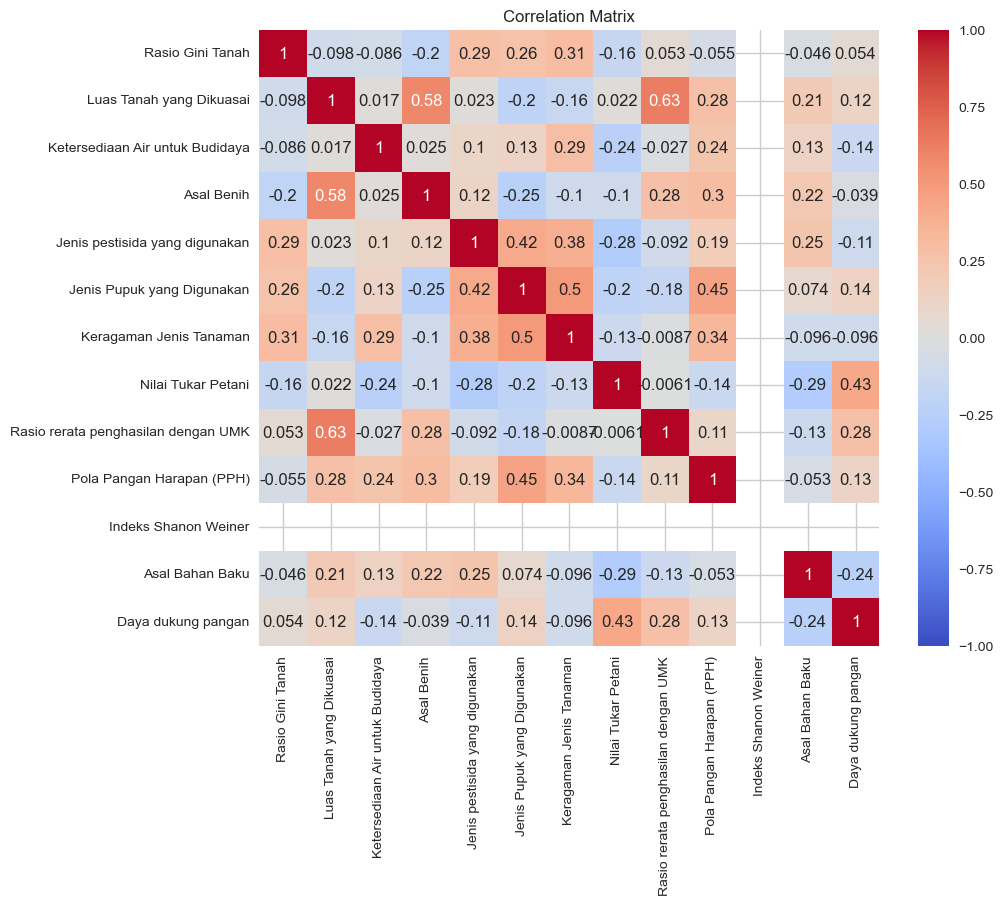

In [14]:
plt.figure(figsize=(10,8))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

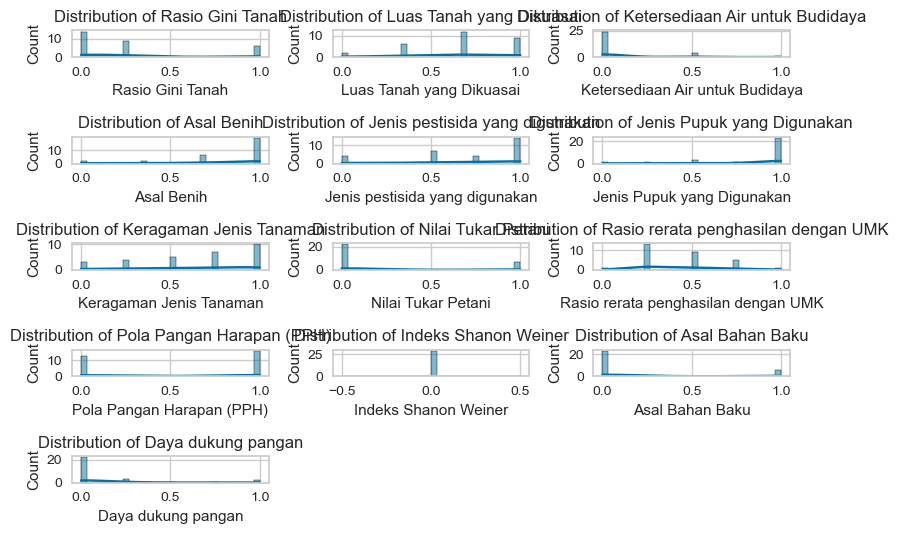

In [15]:
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_normalized[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [16]:
df_normalized

,Desa/Kelurahan,Rasio Gini Tanah,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Jenis pestisida yang digunakan,Jenis Pupuk yang Digunakan,Melakukan pemanfaatan limbah pertanian,Keragaman Jenis Tanaman,Nilai Tukar Petani,Rasio rerata penghasilan dengan UMK,Pola Pangan Harapan (PPH),Indeks Shanon Weiner,Asal Bahan Baku,Daya dukung pangan
0,Balauring,0.00,1.000000,0.0,1.000000,1.00,0.50,1,0.00,0.0,0.50,0.0,0.0,0.0,0.00
1,Benihading,0.25,1.000000,0.5,1.000000,1.00,1.00,4,1.00,0.0,0.25,1.0,0.0,1.0,0.00
2,Bour,0.25,0.666667,0.5,0.666667,0.00,0.75,4,0.75,0.0,0.75,1.0,0.0,0.0,0.25
3,Dikesare,0.00,0.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.25,0.0,0.0,0.0,0.00
4,Duawutun,1.00,1.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.75,0.0,0.0,1.0,0.00
5,Dulitukan,1.00,0.333333,0.0,1.000000,1.00,1.00,0,1.00,0.0,0.25,0.0,0.0,0.0,0.00
6,Hoelea I,0.25,1.000000,0.0,1.000000,0.50,0.25,0,0.25,0.0,0.50,0.0,0.0,0.0,0.00
7,Ile Kimok,0.00,1.000000,0.0,1.000000,0.50,1.00,2,0.00,0.0,0.50,1.0,0.0,1.0,0.00
8,Kalikur,0.00,0.666667,0.0,1.000000,0.00,0.00,1,0.25,1.0,0.50,0.0,0.0,0.0,0.00
9,Katakeja,0.25,0.000000,0.0,0.000000,0.50,1.00,1,1.00,0.0,0.25,0.0,0.0,0.0,0.00


In [17]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Desa/Kelurahan                          29 non-null     object 
 1   Rasio Gini Tanah                        29 non-null     float64
 2   Luas Tanah yang Dikuasai                29 non-null     float64
 3   Ketersediaan Air untuk Budidaya         29 non-null     float64
 4   Asal Benih                              29 non-null     float64
 5   Jenis pestisida yang digunakan          29 non-null     float64
 6   Jenis Pupuk yang Digunakan              29 non-null     float64
 7   Melakukan pemanfaatan limbah pertanian  29 non-null     int32  
 8   Keragaman Jenis Tanaman                 29 non-null     float64
 9   Nilai Tukar Petani                      29 non-null     float64
 10  Rasio rerata penghasilan dengan UMK     29 non-null     float64


In [18]:
df_normalized_num = df_normalized.select_dtypes(include=['number'])

In [19]:
df_normalized_num

,Rasio Gini Tanah,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Jenis pestisida yang digunakan,Jenis Pupuk yang Digunakan,Melakukan pemanfaatan limbah pertanian,Keragaman Jenis Tanaman,Nilai Tukar Petani,Rasio rerata penghasilan dengan UMK,Pola Pangan Harapan (PPH),Indeks Shanon Weiner,Asal Bahan Baku,Daya dukung pangan
0,0.00,1.000000,0.0,1.000000,1.00,0.50,1,0.00,0.0,0.50,0.0,0.0,0.0,0.00
1,0.25,1.000000,0.5,1.000000,1.00,1.00,4,1.00,0.0,0.25,1.0,0.0,1.0,0.00
2,0.25,0.666667,0.5,0.666667,0.00,0.75,4,0.75,0.0,0.75,1.0,0.0,0.0,0.25
3,0.00,0.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.25,0.0,0.0,0.0,0.00
4,1.00,1.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.75,0.0,0.0,1.0,0.00
5,1.00,0.333333,0.0,1.000000,1.00,1.00,0,1.00,0.0,0.25,0.0,0.0,0.0,0.00
6,0.25,1.000000,0.0,1.000000,0.50,0.25,0,0.25,0.0,0.50,0.0,0.0,0.0,0.00
7,0.00,1.000000,0.0,1.000000,0.50,1.00,2,0.00,0.0,0.50,1.0,0.0,1.0,0.00
8,0.00,0.666667,0.0,1.000000,0.00,0.00,1,0.25,1.0,0.50,0.0,0.0,0.0,0.00
9,0.25,0.000000,0.0,0.000000,0.50,1.00,1,1.00,0.0,0.25,0.0,0.0,0.0,0.00


In [20]:
df_normalized_num = df_normalized.copy()

In [21]:
df_normalized_num = df_normalized_num.drop("Desa/Kelurahan", axis=1)

In [22]:
df_normalized_num

,Rasio Gini Tanah,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Jenis pestisida yang digunakan,Jenis Pupuk yang Digunakan,Melakukan pemanfaatan limbah pertanian,Keragaman Jenis Tanaman,Nilai Tukar Petani,Rasio rerata penghasilan dengan UMK,Pola Pangan Harapan (PPH),Indeks Shanon Weiner,Asal Bahan Baku,Daya dukung pangan
0,0.00,1.000000,0.0,1.000000,1.00,0.50,1,0.00,0.0,0.50,0.0,0.0,0.0,0.00
1,0.25,1.000000,0.5,1.000000,1.00,1.00,4,1.00,0.0,0.25,1.0,0.0,1.0,0.00
2,0.25,0.666667,0.5,0.666667,0.00,0.75,4,0.75,0.0,0.75,1.0,0.0,0.0,0.25
3,0.00,0.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.25,0.0,0.0,0.0,0.00
4,1.00,1.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.75,0.0,0.0,1.0,0.00
5,1.00,0.333333,0.0,1.000000,1.00,1.00,0,1.00,0.0,0.25,0.0,0.0,0.0,0.00
6,0.25,1.000000,0.0,1.000000,0.50,0.25,0,0.25,0.0,0.50,0.0,0.0,0.0,0.00
7,0.00,1.000000,0.0,1.000000,0.50,1.00,2,0.00,0.0,0.50,1.0,0.0,1.0,0.00
8,0.00,0.666667,0.0,1.000000,0.00,0.00,1,0.25,1.0,0.50,0.0,0.0,0.0,0.00
9,0.25,0.000000,0.0,0.000000,0.50,1.00,1,1.00,0.0,0.25,0.0,0.0,0.0,0.00


In [23]:
df_normalized_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Rasio Gini Tanah                        29 non-null     float64
 1   Luas Tanah yang Dikuasai                29 non-null     float64
 2   Ketersediaan Air untuk Budidaya         29 non-null     float64
 3   Asal Benih                              29 non-null     float64
 4   Jenis pestisida yang digunakan          29 non-null     float64
 5   Jenis Pupuk yang Digunakan              29 non-null     float64
 6   Melakukan pemanfaatan limbah pertanian  29 non-null     int32  
 7   Keragaman Jenis Tanaman                 29 non-null     float64
 8   Nilai Tukar Petani                      29 non-null     float64
 9   Rasio rerata penghasilan dengan UMK     29 non-null     float64
 10  Pola Pangan Harapan (PPH)               29 non-null     float64


### pembangunan model clustering

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

<function matplotlib.pyplot.show(close=None, block=None)>

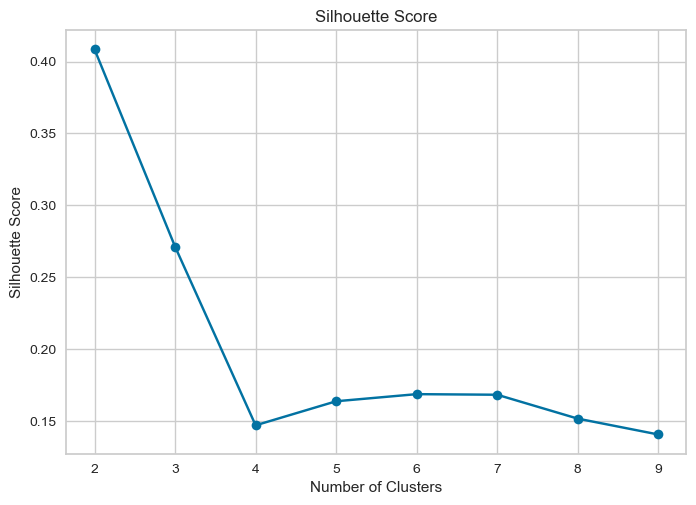

In [24]:
silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42
    )
    kmeans.fit(df_normalized_num)
    silhouette_scores.append(silhouette_score(df_normalized_num, kmeans.labels_))

plt.plot(range(2,10), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show

In [25]:
# melatih model

model_kmeans = KMeans (
    n_clusters=2,
    init='k-means++',
    random_state=42
)
model_kmeans.fit(df_normalized_num)
silhouette_score(df_normalized_num, model_kmeans.labels_)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4084178614755941

### visualisasi hasil clustering

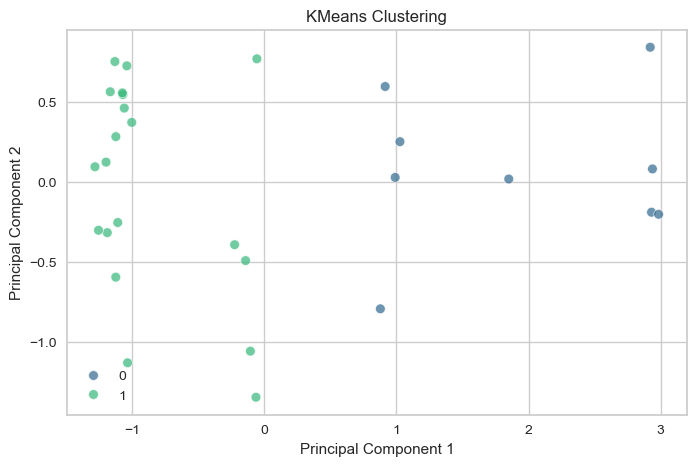

In [26]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized_num)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=model_kmeans.labels_, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
df_normalized_num['cluster'] = model_kmeans.labels_

In [28]:
df_normalized['cluster'] = df_normalized_num['cluster']

In [29]:
df_normalized

,Desa/Kelurahan,Rasio Gini Tanah,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Jenis pestisida yang digunakan,Jenis Pupuk yang Digunakan,Melakukan pemanfaatan limbah pertanian,Keragaman Jenis Tanaman,Nilai Tukar Petani,Rasio rerata penghasilan dengan UMK,Pola Pangan Harapan (PPH),Indeks Shanon Weiner,Asal Bahan Baku,Daya dukung pangan,cluster
0,Balauring,0.00,1.000000,0.0,1.000000,1.00,0.50,1,0.00,0.0,0.50,0.0,0.0,0.0,0.00,1
1,Benihading,0.25,1.000000,0.5,1.000000,1.00,1.00,4,1.00,0.0,0.25,1.0,0.0,1.0,0.00,0
2,Bour,0.25,0.666667,0.5,0.666667,0.00,0.75,4,0.75,0.0,0.75,1.0,0.0,0.0,0.25,0
3,Dikesare,0.00,0.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.25,0.0,0.0,0.0,0.00,1
4,Duawutun,1.00,1.000000,0.0,0.666667,1.00,1.00,0,0.50,0.0,0.75,0.0,0.0,1.0,0.00,1
5,Dulitukan,1.00,0.333333,0.0,1.000000,1.00,1.00,0,1.00,0.0,0.25,0.0,0.0,0.0,0.00,1
6,Hoelea I,0.25,1.000000,0.0,1.000000,0.50,0.25,0,0.25,0.0,0.50,0.0,0.0,0.0,0.00,1
7,Ile Kimok,0.00,1.000000,0.0,1.000000,0.50,1.00,2,0.00,0.0,0.50,1.0,0.0,1.0,0.00,0
8,Kalikur,0.00,0.666667,0.0,1.000000,0.00,0.00,1,0.25,1.0,0.50,0.0,0.0,0.0,0.00,1
9,Katakeja,0.25,0.000000,0.0,0.000000,0.50,1.00,1,1.00,0.0,0.25,0.0,0.0,0.0,0.00,1


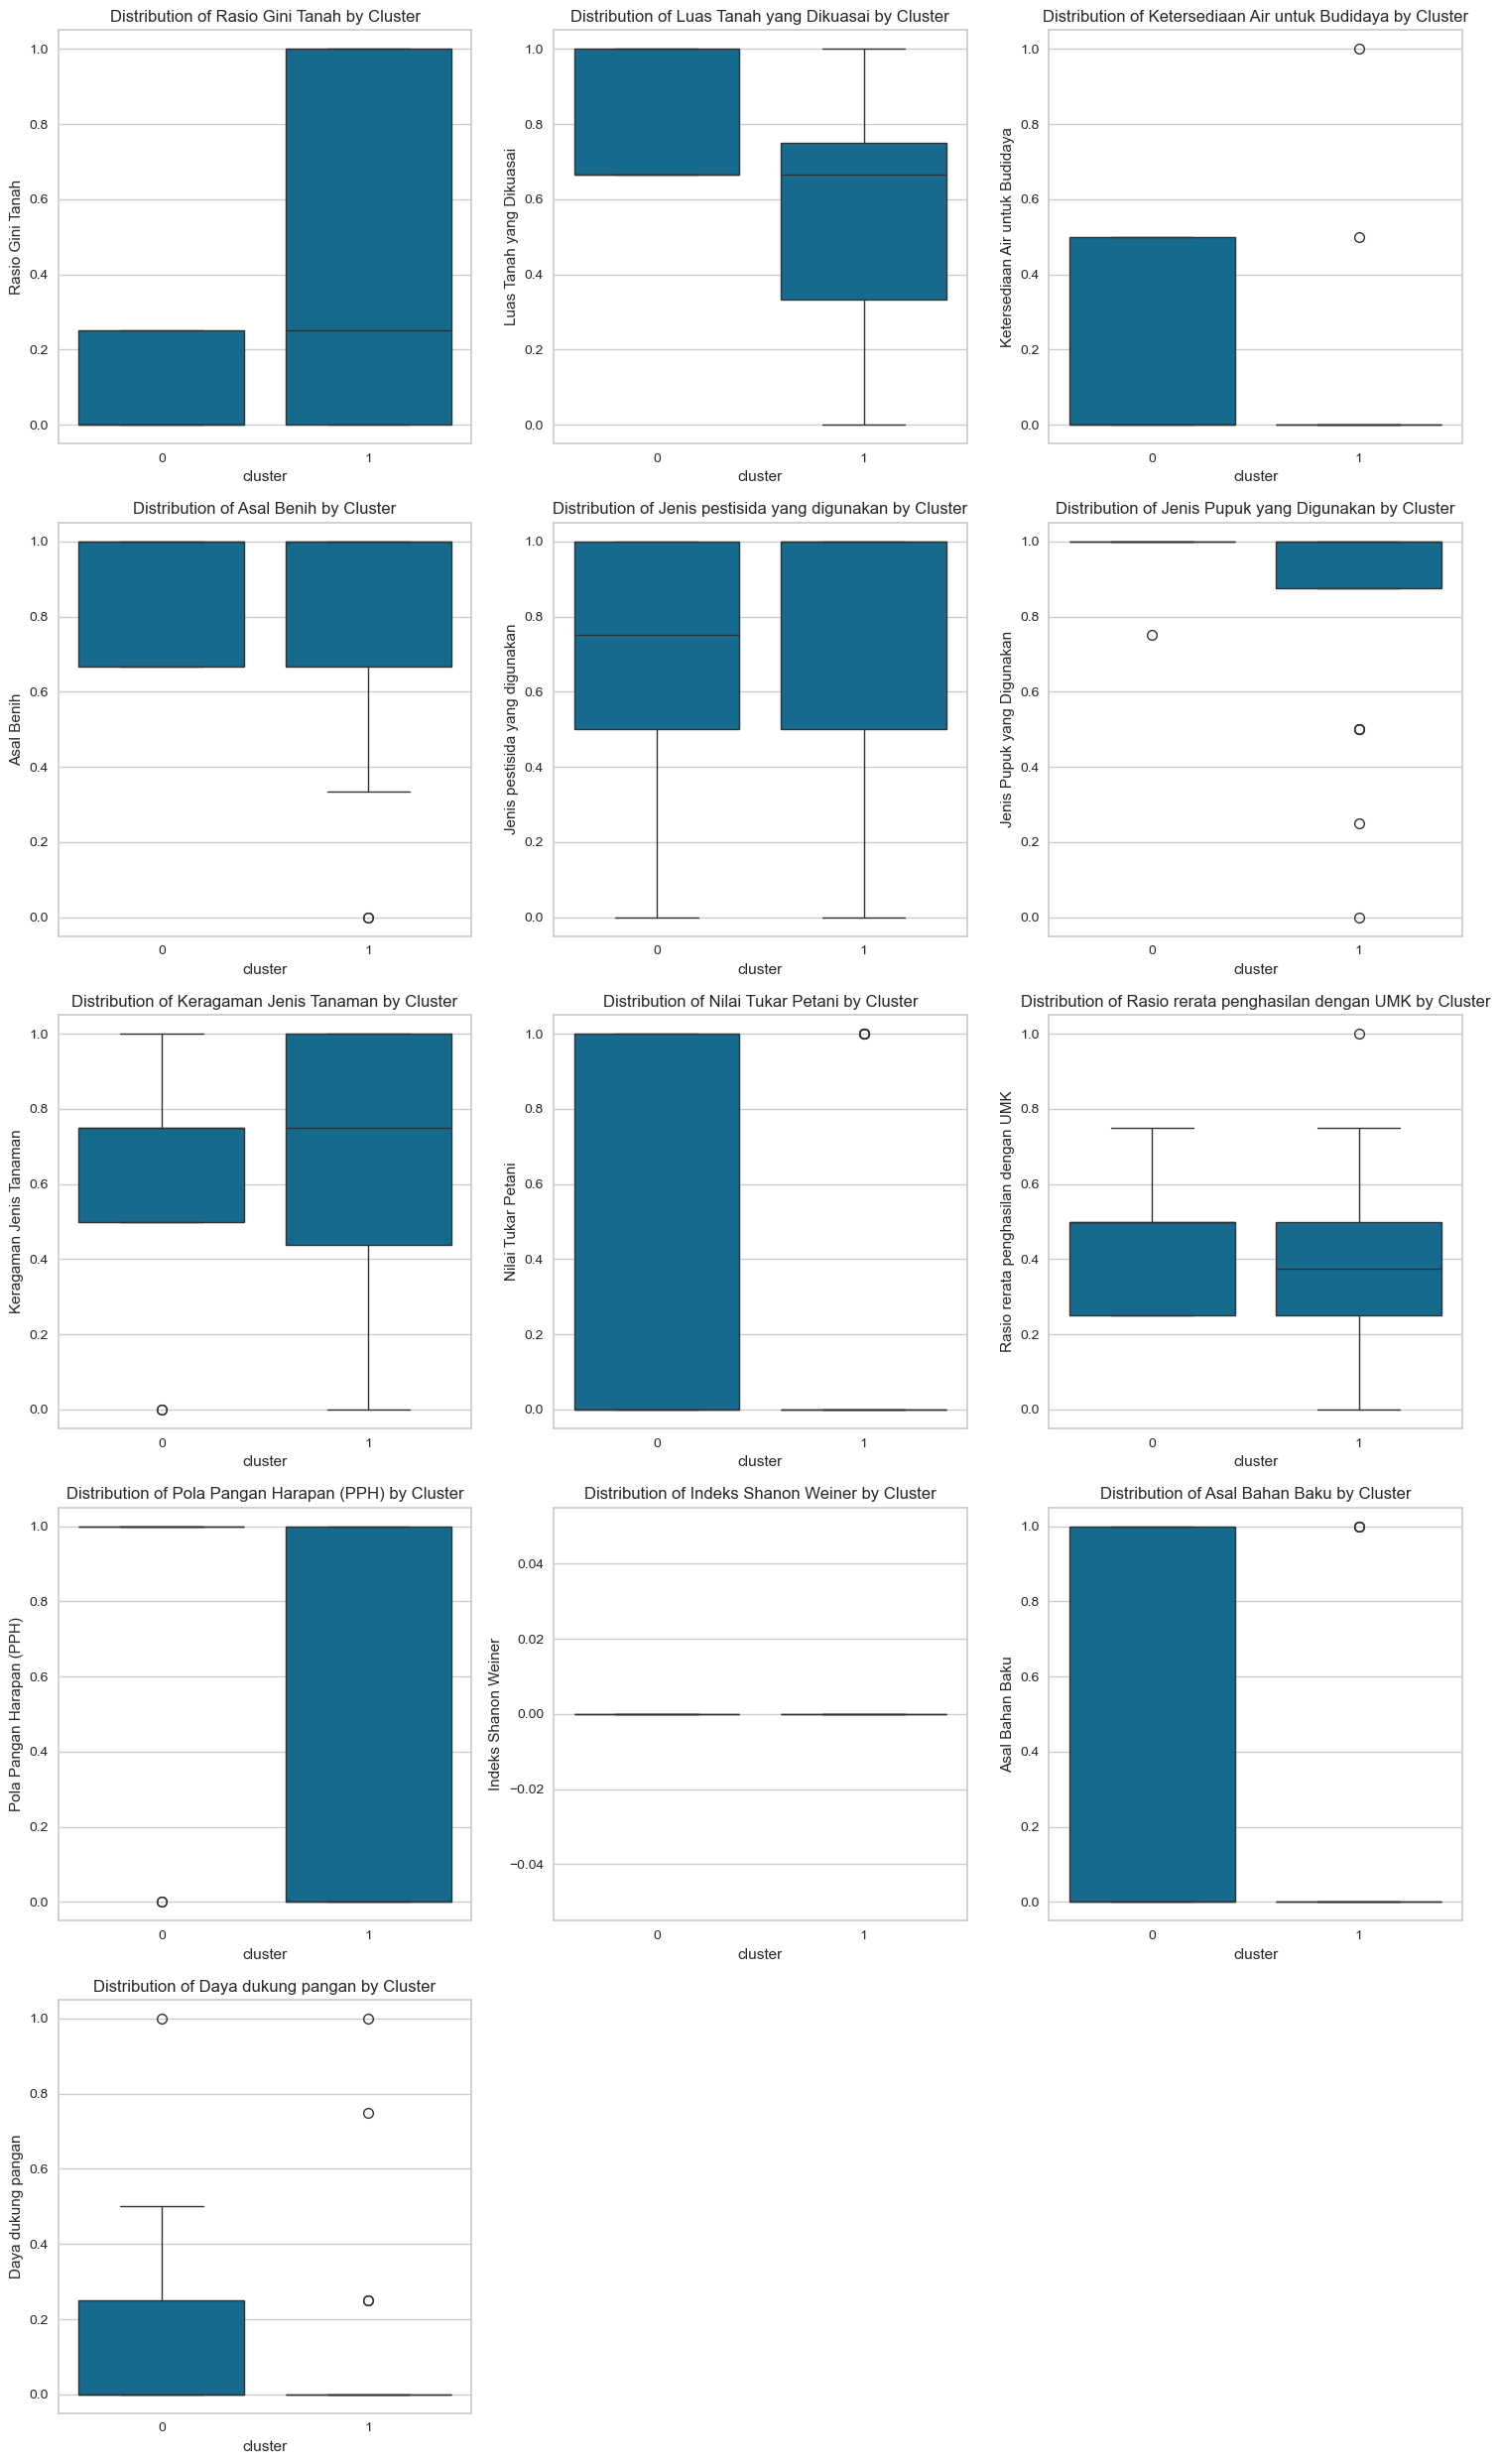

In [30]:
# variabel numerik

plt.figure(figsize=(15,25))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='cluster', y=column, data=df_normalized)
    plt.title(f'Distribution of {column} by Cluster')

plt.tight_layout()
plt.show()

## coba hierarchical clustering

In [31]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [32]:
# Simpan nama desa terpisah
desa = df["Desa/Kelurahan"]

# Ambil hanya variabel numerik
X = df.drop("Desa/Kelurahan", axis=1)

# Tangani missing value (misalnya isi dengan median)
X = X.fillna(X.median())

# (opsional) Scaling → lebih adil antar indikator
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

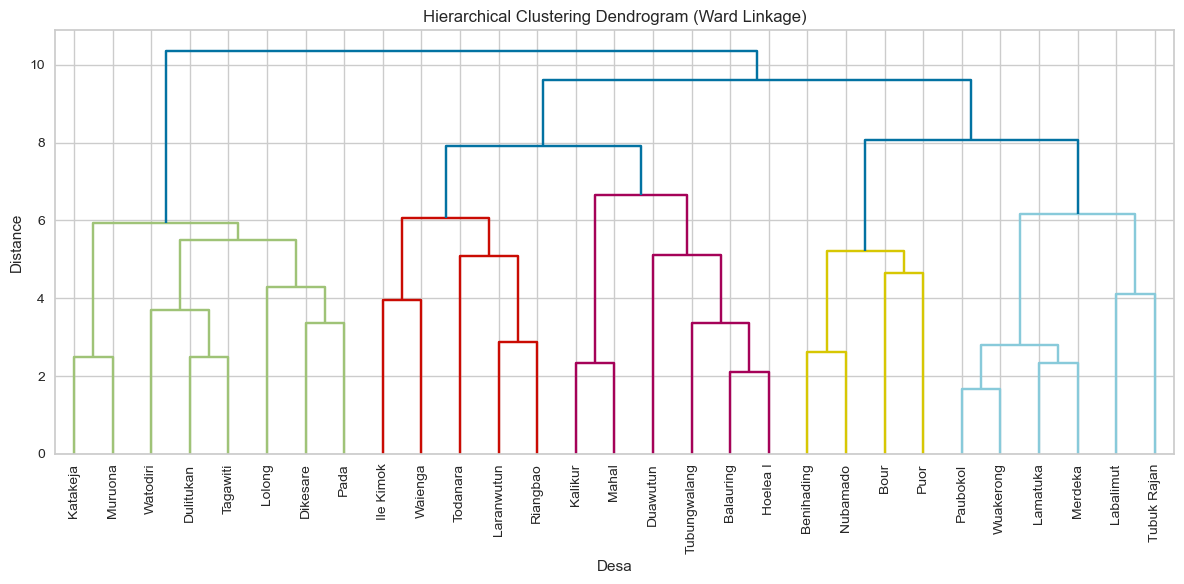

In [33]:
# linkage: 'ward' cocok untuk data numerik
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [34]:
clusters = fcluster(Z, 4, criterion="maxclust")

df_clusters = pd.DataFrame({
    "Desa": desa,
    "Cluster": clusters
})

print(df_clusters.sort_values("Cluster"))

            Desa  Cluster
3       Dikesare        1
5      Dulitukan        1
22      Tagawiti        1
18          Pada        1
9       Katakeja        1
16       Muruona        1
27      Watodiri        1
13        Lolong        1
0      Balauring        2
26       Waienga        2
25  Tubungwalang        2
23      Todanara        2
21      Riangbao        2
14         Mahal        2
8        Kalikur        2
7      Ile Kimok        2
6       Hoelea I        2
4       Duawutun        2
12    Laranwutun        2
17      Nubamado        3
20          Puor        3
2           Bour        3
1     Benihading        3
11      Lamatuka        4
15       Merdeka        4
10     Labalimut        4
19      Paubokol        4
24   Tubuk Rajan        4
28     Wuakerong        4


In [35]:
df_hc = df.copy()

In [36]:
df_hc['cluster'] = df_clusters['Cluster']

In [37]:
df_hc

,Desa/Kelurahan,Rasio Gini Tanah,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Jenis pestisida yang digunakan,Jenis Pupuk yang Digunakan,Melakukan pemanfaatan limbah pertanian,Keragaman Jenis Tanaman,Nilai Tukar Petani,Rasio rerata penghasilan dengan UMK,Pola Pangan Harapan (PPH),Indeks Shanon Weiner,Asal Bahan Baku,Daya dukung pangan,cluster
0,Balauring,0,4,0,4,4,2,1,0,0,2,0,0,3,0,2
1,Benihading,1,4,1,4,4,4,4,4,0,1,1,0,4,0,3
2,Bour,1,3,1,3,0,3,4,3,0,3,1,0,3,1,3
3,Dikesare,0,1,0,3,4,4,0,2,0,1,0,0,3,0,1
4,Duawutun,4,4,0,3,4,4,0,2,0,3,0,0,4,0,2
5,Dulitukan,4,2,0,4,4,4,0,4,0,1,0,0,3,0,1
6,Hoelea I,1,4,0,4,2,1,0,1,0,2,0,0,3,0,2
7,Ile Kimok,0,4,0,4,2,4,2,0,0,2,1,0,4,0,2
8,Kalikur,0,3,0,4,0,0,1,1,4,2,0,0,3,0,2
9,Katakeja,1,1,0,1,2,4,1,4,0,1,0,0,3,0,1


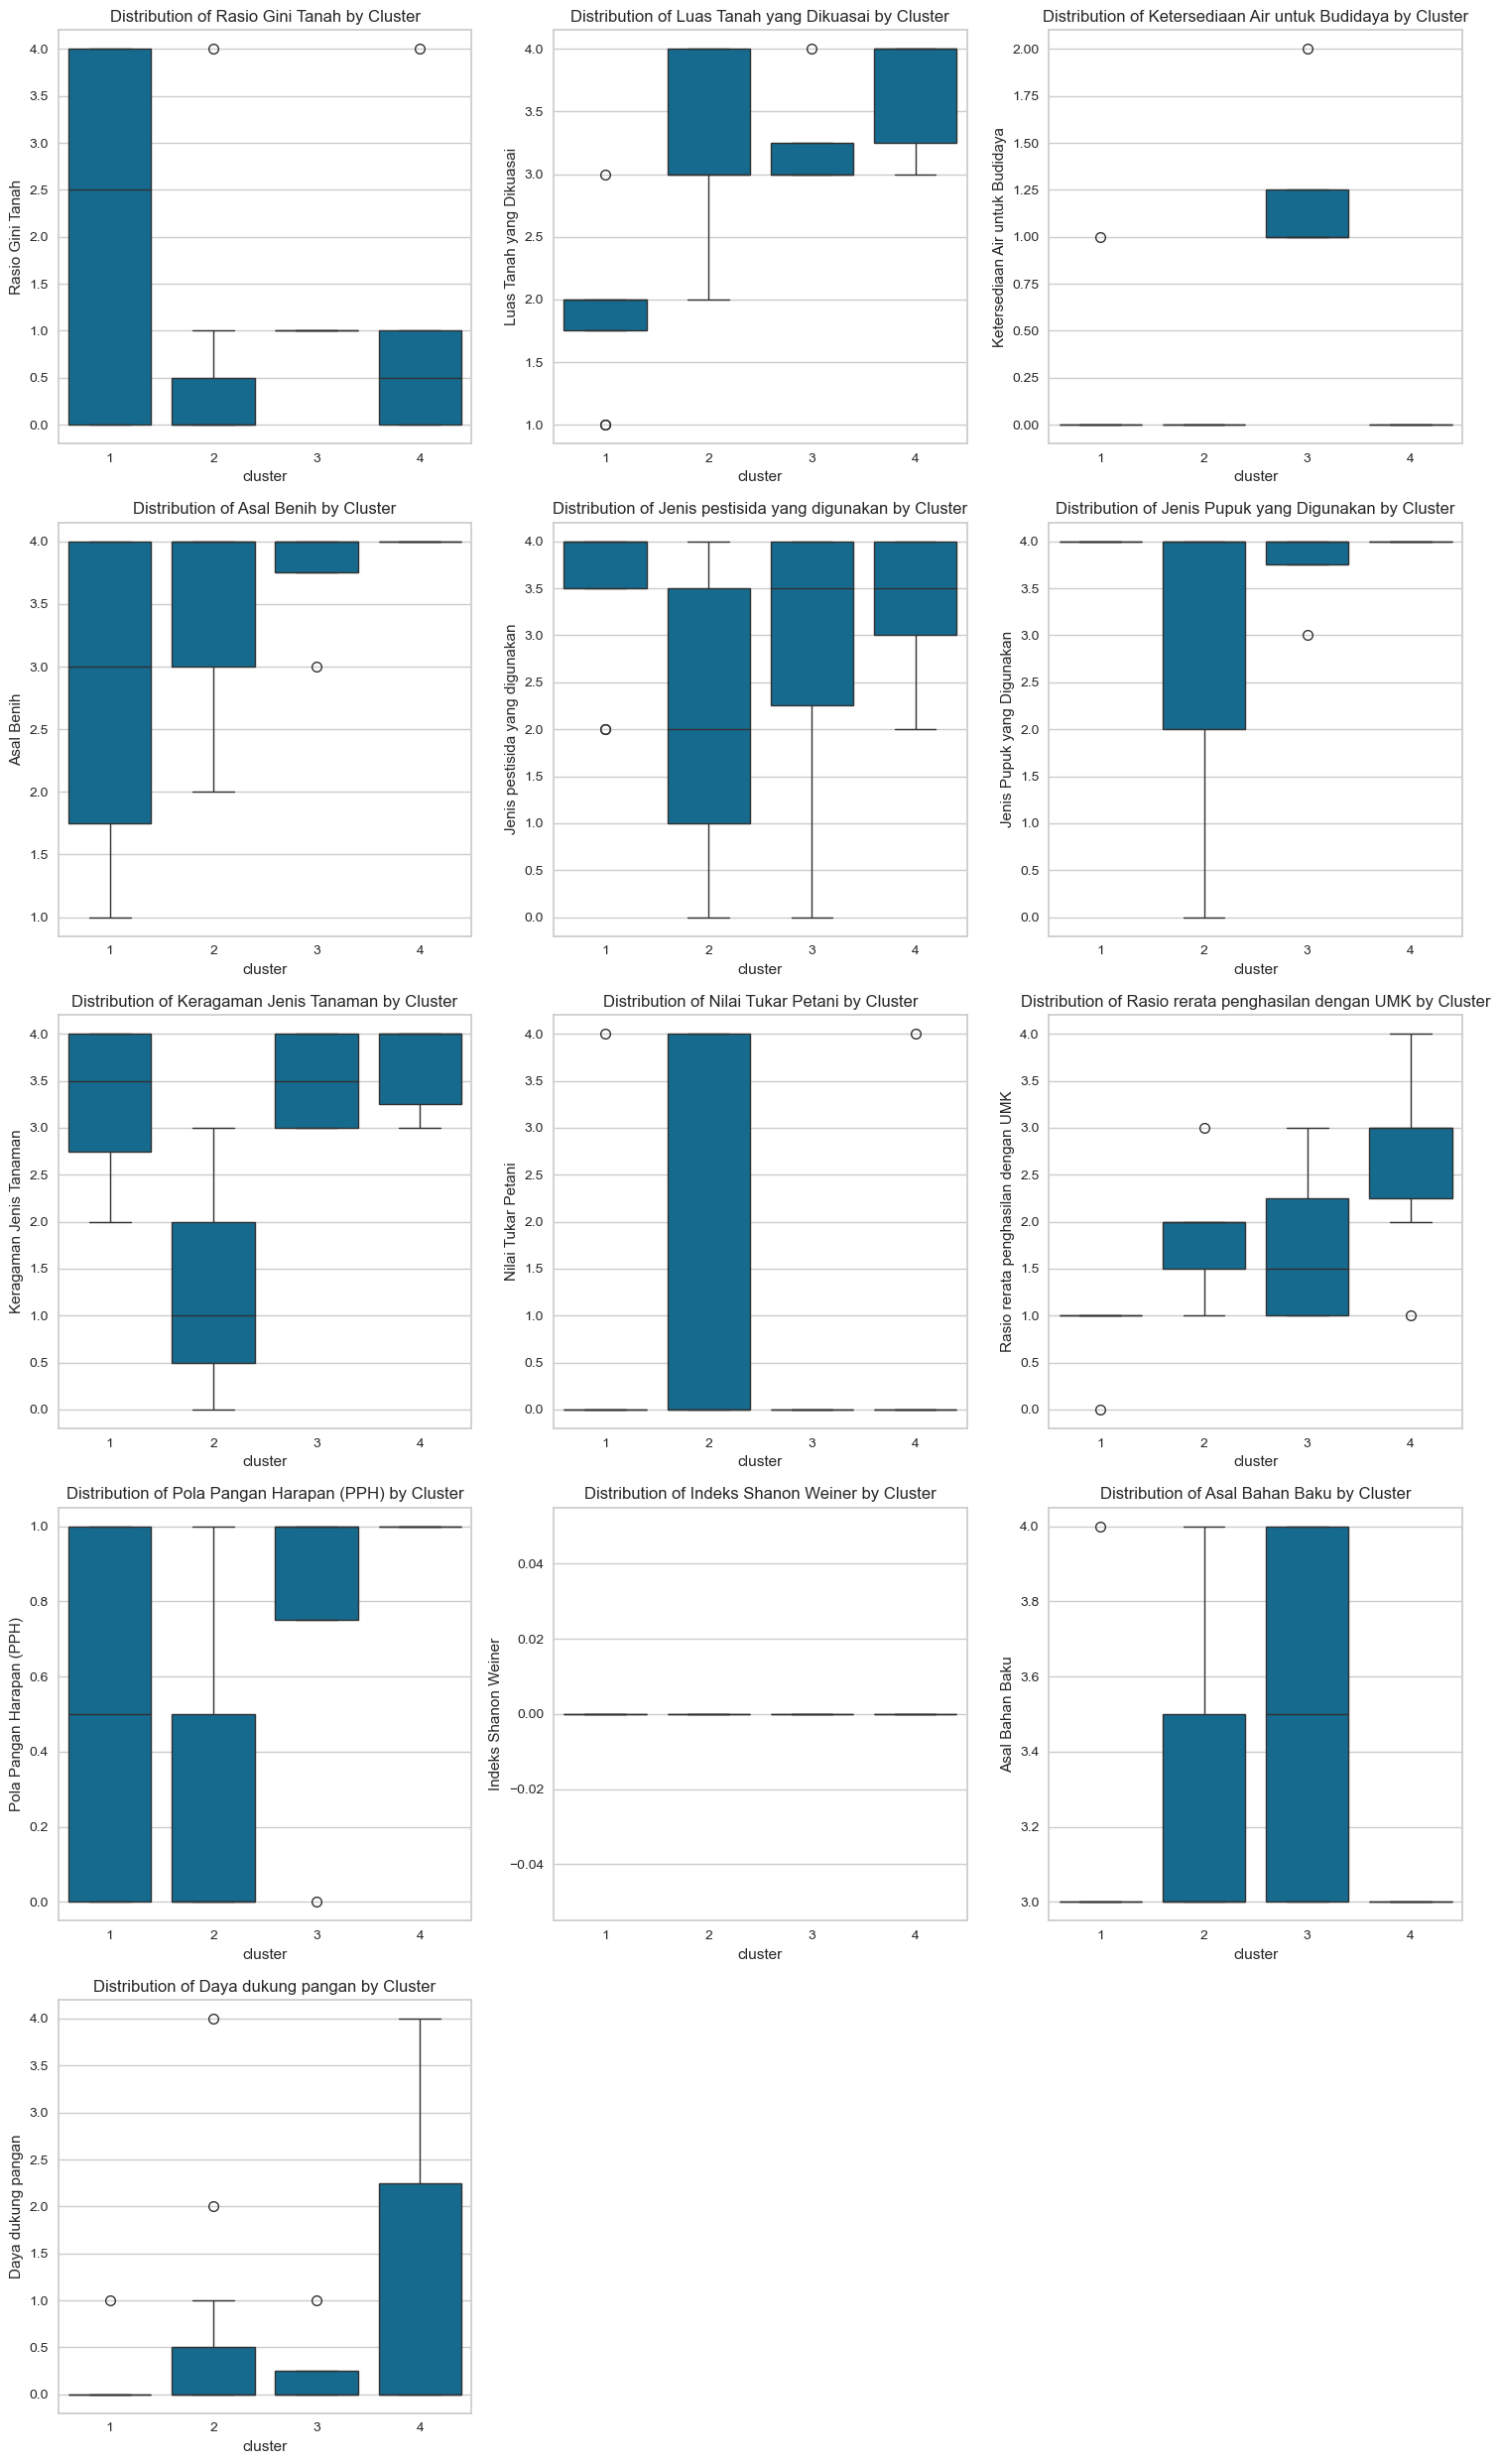

In [38]:
plt.figure(figsize=(15, 25))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x="cluster", y=column, data=df_hc)
    plt.title(f"Distribution of {column} by Cluster")

plt.tight_layout()
plt.show()
